![Tech Salary Trends Background](image.png)

 # How Are Tech Salaries Shaping Up in 2020-2024? Part 2
 by John Mike Asuncion

## Executive Summary

This Level 2 analysis examines tech salary trends from 2020 to 2024 using a dataset of 57,194 salary records. The report addresses three key objectives to provide actionable insights for an international HR consultancy:

- **Top 5 Job Titles by Salary**: The highest-paying roles are Analytics Engineering Manager (\$399,880), Data Science Tech Lead (\$375,000), Applied AI/ML Lead (\$292,500), Head of Machine Learning (\$288,701), and Engineering Manager (\$262,526), as visualized in a bar chart.
- **Remote Work Salary Trends**: On-site workers (0%) earn the highest average salary at \$162,402, followed by fully remote (100%) at \$149,675, and hybrid (50%) at \$81,867, indicating a surprising premium for on-site work.
- **Salary Distribution by Company Size**: Medium companies (M) offer the highest average salary at \$159,725, followed by large companies (L) at \$152,617, and small companies (S) at \$87,672, with a box plot illustrating the distribution.

**Brief Recommendations**: Offer competitive salaries above \$375,000 for top roles, consider on-site work incentives given the salary premium, and benchmark against medium-sized companies. Enhance future data collection with variables like industry sector for deeper insights.

## I. Background
Tech companies face fierce competition for talent, making salary insights critical for attracting and retaining skilled professionals. This analysis leverages a global salary dataset to uncover trends in job roles, experience levels, and remote work, helping an international HR consultancy stay competitive. With remote work surging and tech roles diversifying, understanding these drivers is more vital than ever.

## II. Objectives
This report aims to provide actionable insights into tech salary trends by addressing the following goals:

- Create a bar chart displaying the top 5 job titles with the highest average salary (in USD).
- Compare the average salaries for employees working remotely 100%, 50%, and 0%, and identify patterns or trends.
- Visualize the salary distribution (in USD) across company sizes (S, M, L) and determine which company size offers the highest average salary.

## III. Data Description
The dataset, sourced from a survey hosted by an HR consultancy, is stored in `salaries.csv`. Each row represents an employee’s salary record for a given year. The columns are as follows:

| Column Name         | Description                                      | Expected Data Type |  
|---------------------|--------------------------------------------------|-------------------|  
| `work_year`         | Year of work                                     | int              |  
| `experience_level`  | Level of experience (e.g., EN, MI, SE, EX)       | str              |  
| `employment_type`   | Type of employment (e.g., FT, PT, CT, FL)        | str              |  
| `job_title`         | Job title of the employee                        | str              |  
| `salary`            | Salary amount in original currency               | int              |  
| `salary_currency`   | Currency of the salary                           | str              |  
| `salary_in_usd`     | Salary amount converted to USD                   | int              |  
| `employee_residence`| Country code of employee residence               | str              |  
| `remote_ratio`      | Remote work ratio (0, 50, 100)                   | int              |  
| `company_location`  | Country code of company location                 | str              |  
| `company_size`      | Size of the company (S, M, L)                    | str              |  


Let's load the data to begin our analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

salaries_df = pd.read_csv('salaries.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M


In [2]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


## IV. Data Preparation

### Data Quality Check and Data Cleaning
Data preparation ensures reliable analysis by addressing potential issues. Each check builds a foundation for trustworthy insights.

1. **Checking Column Headers**

Headers guide our analysis. Missing or misnamed columns, like `salary_in_usd`, could derail salary comparisons.

In [3]:
salaries_df.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

2. **Checking for Missing Values**

Missing data, such as blank salaries, skews results. Checking ensures completeness for accurate averages.

In [4]:
salaries_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

3. **Checking Data Types**

Incorrect types, like text for `salary_in_usd`, prevent calculations. Verification ensures compatibility.

In [5]:
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

4. **Checking for Anomalies**

Inconsistent values, like 'FT' vs. 'Full-Time', fragment data. Inspecting unique values maintains clarity.

In [6]:
salaries_df['employment_type'].value_counts()

employment_type
FT    56975
PT      113
CT       90
FL       16
Name: count, dtype: int64

5. **Standardizing Text in Categorical Columns**

Text standardization to snake case (e.g., 'Data Engineer' to 'data_engineer') ensures uniformity.

In [7]:
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
                    'employee_residence', 'company_location', 'company_size']

for col in categorical_cols:
    salaries_df[col] = salaries_df[col].str.lower().str.replace(' ', '_')

print("Sample of standardized 'job_title': \n", salaries_df['job_title'].head())

Sample of standardized 'job_title': 
 0    developer
1    developer
2    developer
3    developer
4    developer
Name: job_title, dtype: object


**Findings:** No missing values across all 57,194 rows, confirming complete data. Data types are appropriate (e.g., `salary_in_usd` as int64), supporting accurate analysis, and text standardization to snake case ensures uniformity. No duplicates detected, ensuring unique records.

## V. Exploratory Data Analysis

### 1. Top 5 Job Titles with the Highest Average Salary

To identify the most lucrative roles, we calculate the average salary for each job title and visualize the top 5 using a bar chart.

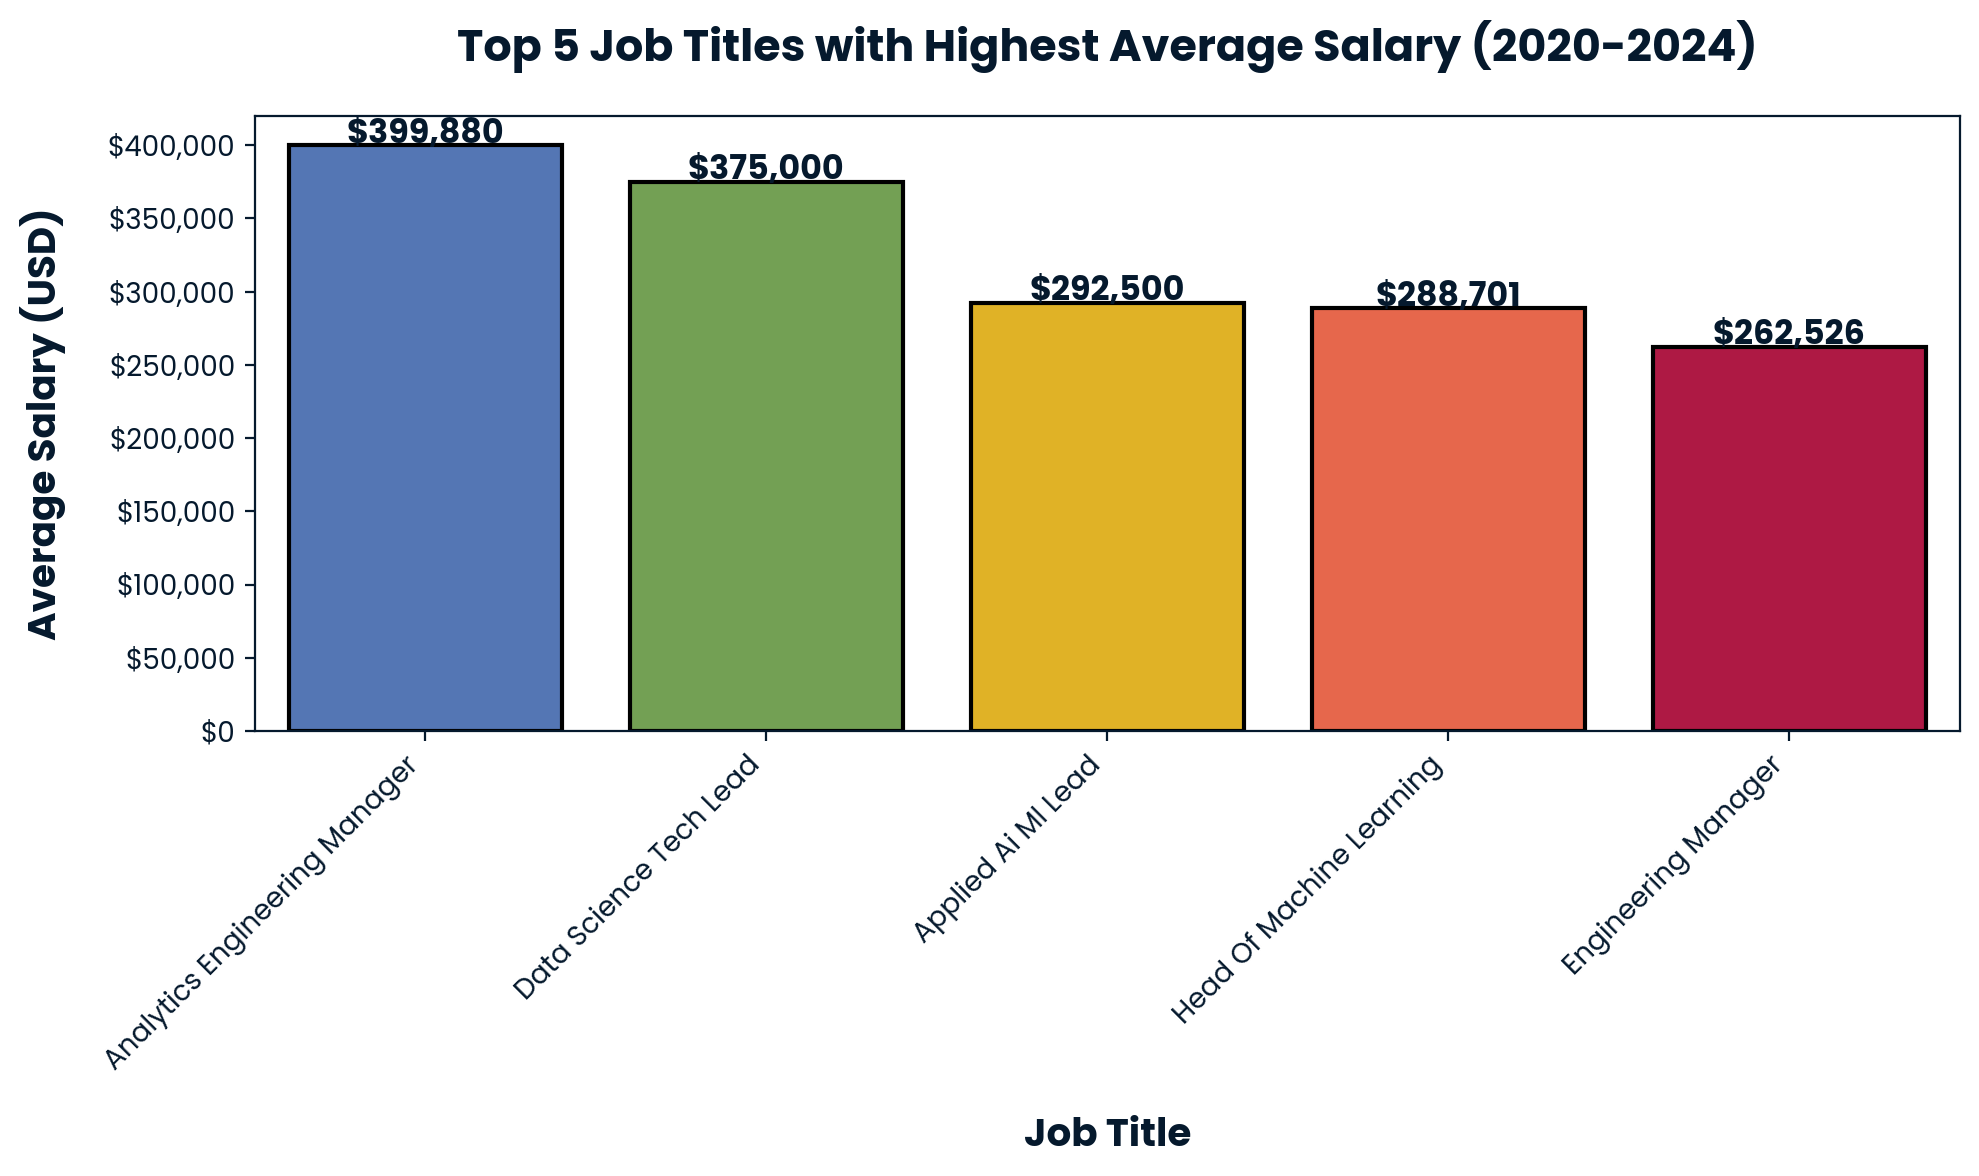

In [8]:
# Calculate average salary by job title and select top 5
avg_salary_by_title = salaries_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
top_5_titles = avg_salary_by_title.head(5).reset_index()

# Convert job titles to proper case for display
top_5_titles['job_title'] = top_5_titles['job_title'].str.replace('_', ' ').str.title()

# Create bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='job_title', y='salary_in_usd', data=top_5_titles,
                 palette=['#4472C4', '#70AD47', '#FFC107', '#FF5733', '#C70039'],
                 edgecolor='black', linewidth=1.5)

# Add salary labels on top of bars
for i, salary in enumerate(top_5_titles['salary_in_usd']):
    ax.text(i, salary + 2000, f'${salary:,.0f}', ha='center', fontsize=12, fontweight='bold')

# Customize plot
plt.title('Top 5 Job Titles with Highest Average Salary (2020-2024)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Job Title', fontsize=14, labelpad=15, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, labelpad=15, fontweight='bold')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Finding**: The top 5 job titles by average salary are Analytics Engineering Manager (\$399,880), Data Science Tech Lead (\$375,000), Applied AI/ML Lead (\$292,500), Head of Machine Learning (\$288,701), and Engineering Manager (\$262,526).
- **Insights**: Leadership and specialized roles dominate, with Analytics Engineering Manager and Data Science Tech Lead leading, reflecting the high demand for expertise in analytics and data science. The significant gap between the top two roles and the others suggests a premium for these specific positions.
- **Why It Matters**: Identifying high-paying roles helps clients allocate budgets effectively, focusing on critical positions to attract top talent.

### 2. Average Salaries by Remote Work Ratio (100%, 50%, 0%)

Next, we compare average salaries across different remote work ratios to identify trends.

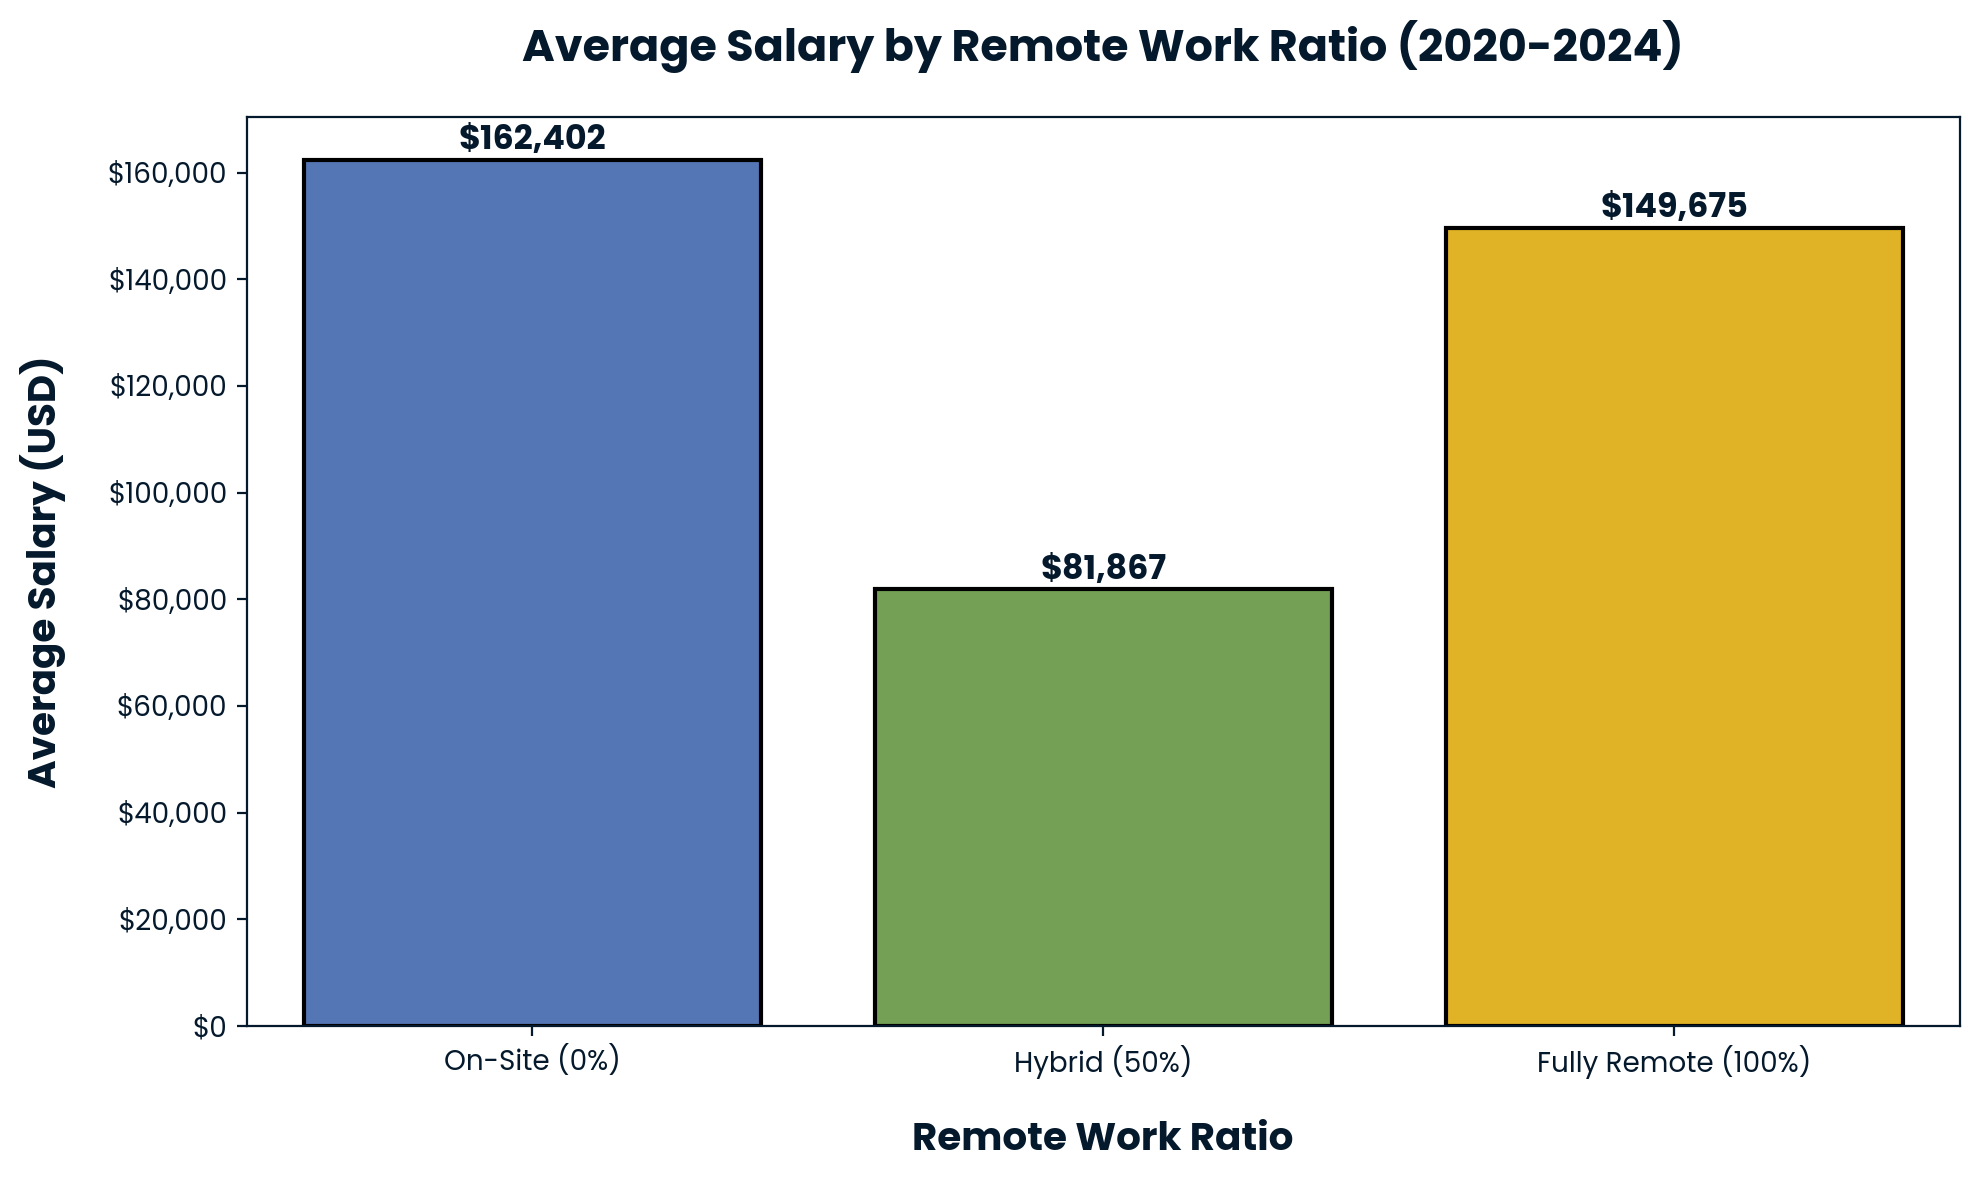

In [9]:
# Calculate average salary by remote_ratio
avg_salary_by_remote = salaries_df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

# Map remote_ratio to descriptive labels
remote_labels = {0: 'On-Site (0%)', 50: 'Hybrid (50%)', 100: 'Fully Remote (100%)'}
avg_salary_by_remote['remote_ratio'] = avg_salary_by_remote['remote_ratio'].map(remote_labels)

# Create bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='remote_ratio', y='salary_in_usd', data=avg_salary_by_remote,
                palette=['#4472C4', '#70AD47', '#FFC107'],
                edgecolor='black', linewidth=1.5)

# Add salary labels on top of bars
for i, salary in enumerate(avg_salary_by_remote['salary_in_usd']):
    ax.text(i, salary + 2000, f'${salary:,.0f}', ha='center', fontsize=12, fontweight='bold')
    
# Customize plot
plt.title('Average Salary by Remote Work Ratio (2020-2024)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Remote Work Ratio', fontsize=14, labelpad=15, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, labelpad=15, fontweight='bold')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.tight_layout()
plt.show()

- **Finding**: On-site workers (0%) earn the highest average salary at \$162,402, followed by fully remote workers (100%) at \$149,675, and hybrid workers (50%) at \$81,867.
- **Patterns and Trends**: Contrary to common trends, on-site workers earn a premium of about 8.5% over fully remote workers, possibly due to higher-paying roles requiring physical presence or being concentrated in high-cost regions. Hybrid workers earn significantly less, suggesting that hybrid roles may be less senior or in lower-paying regions.
- **Why It Matters**: The unexpected salary premium for on-site work suggests that offering incentives for on-site roles could attract top talent, while remote work remains competitive but not the highest-paying option.

### 3. Salary Distribution Across Company Sizes (S, M, L)

Finally, we visualize the salary distribution across company using a box plot to understand variability and identify which size offers the highest average salary.

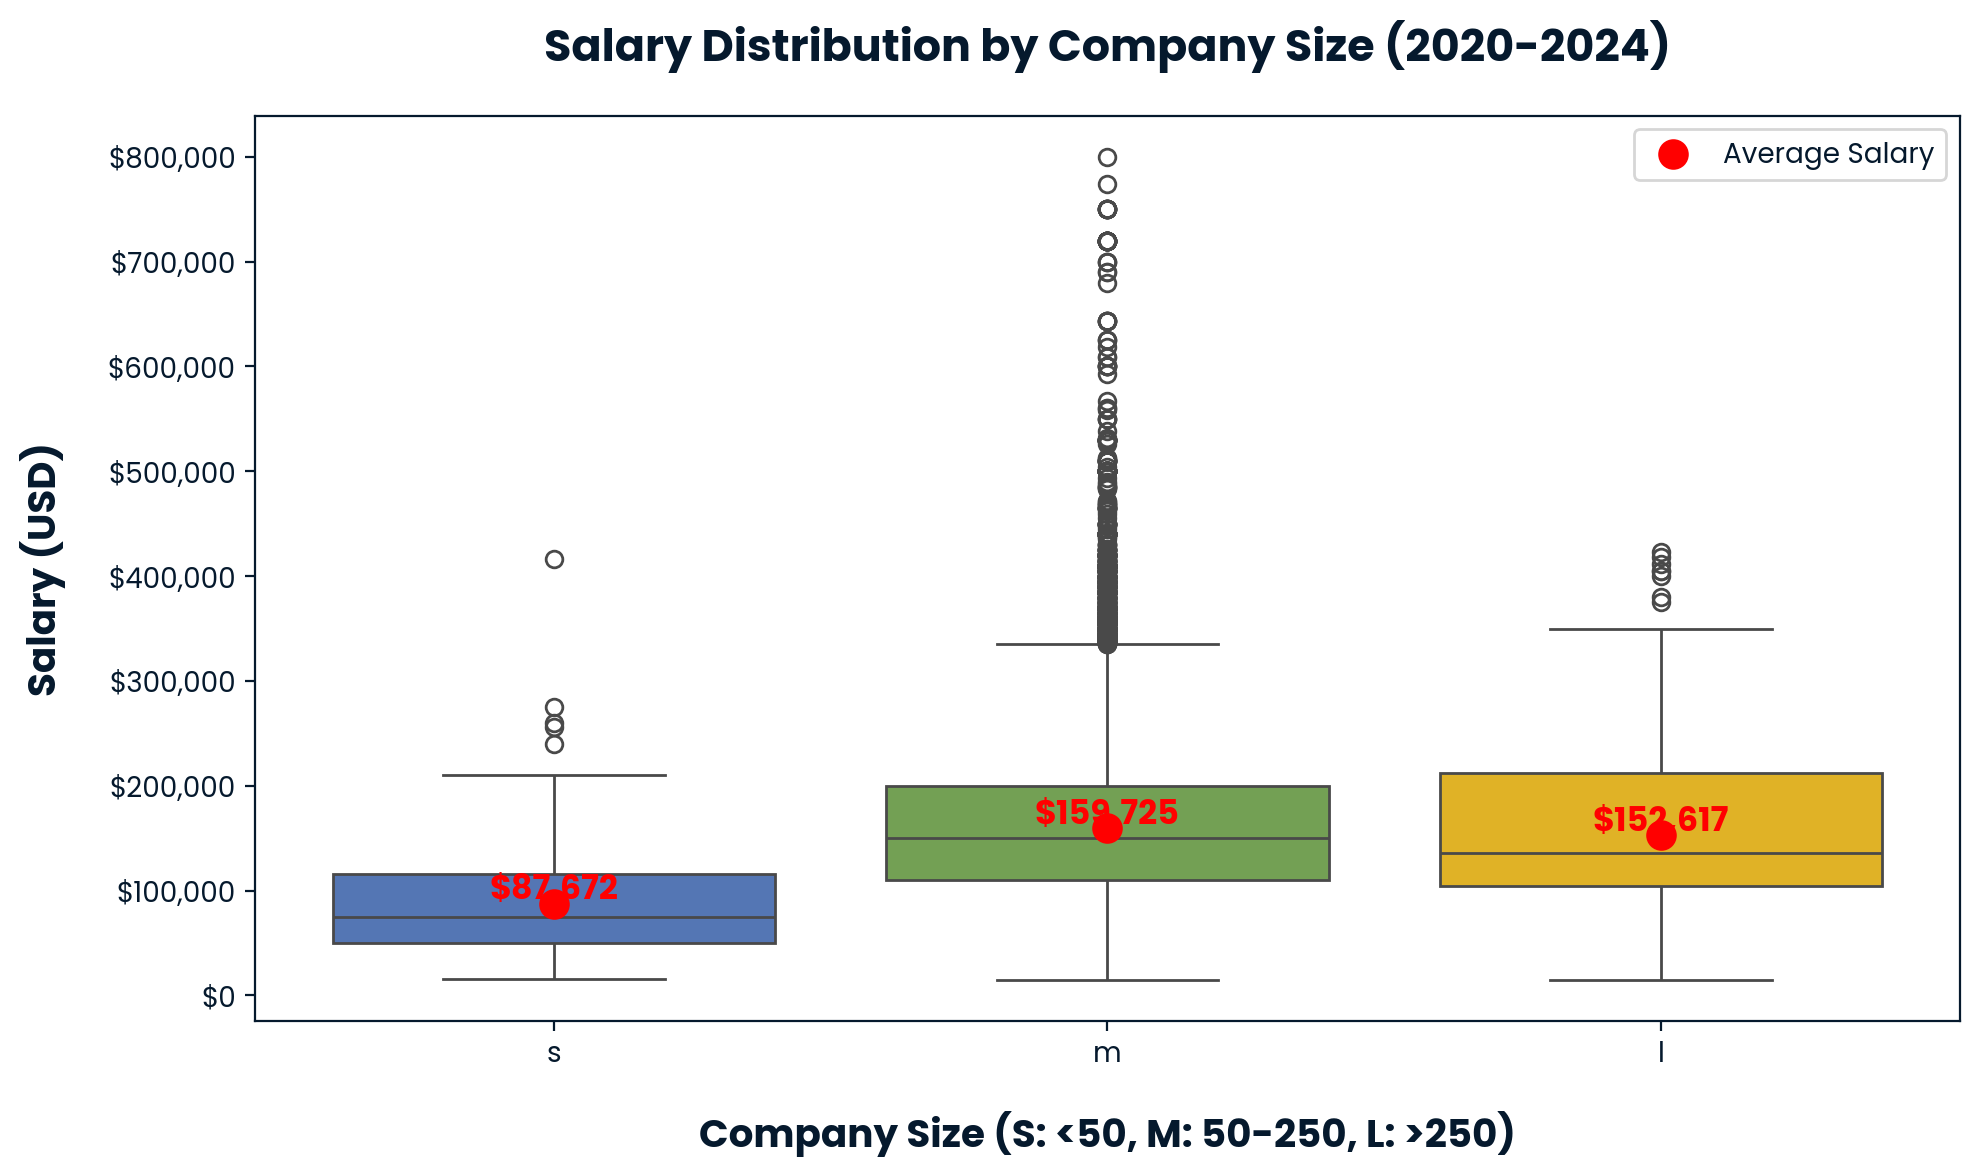

In [10]:
# Create box plot for salary distribution by company size
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=salaries_df, 
            palette=['#4472C4', '#70AD47', '#FFC107'], order=['s', 'm', 'l'], 
            fill=True)

# Calculate average salary by company size
avg_salary_by_size = salaries_df.groupby('company_size')['salary_in_usd'].mean().reindex(['s', 'm', 'l'])

# Add average salary as points on the box plot
for i, size in enumerate(['s', 'm', 'l']):
    avg = avg_salary_by_size[size]
    plt.scatter(i, avg, color='red', s=100, label='Average Salary' if i == 0 else "", zorder=5)
    plt.text(i, avg + 5000, f'${avg:,.0f}', ha='center', fontsize=12, fontweight='bold', color='red')

# Customize plot
plt.title('Salary Distribution by Company Size (2020-2024)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Company Size (S: <50, M: 50-250, L: >250)', fontsize=14, labelpad=15, fontweight='bold')
plt.ylabel('Salary (USD)', fontsize=14, labelpad=15, fontweight='bold')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.legend()
plt.tight_layout()
plt.show()

- **Finding**: Medium companies (M) offer the highest average salary at \$159,725, followed by large companies (L) at \$152,617, and small companies (S) at \$87,672.
- **Insights**: Medium-sized companies lead in average salary, possibly due to a balance of competitive pay and a higher proportion of senior roles compared to small companies, which have the lowest average and a narrower salary range. Large companies show the widest range, with outliers reaching up to \$800,000, indicating a mix of junior and highly paid senior roles.
- **Why It Matters**: Understanding salary distributions by company size allows clients to benchmark their compensation packages, particularly against medium-sized companies, to remain competitive.

## Recommendations

- **For Executives**: Offer salaries above \$375K for top roles like Analytics Engineering Manager and Data Science Tech Lead to attract high-caliber talent, especially for leadership positions in analytics and data science.
- **For HR Teams**: Consider incentives for on-site work, as on-site workers earn an 8.5% premium over fully remote workers, making this a potential strategy to attract top talent in high-paying roles.
- **Benchmarking**: Use medium-sized companies (M) as a benchmark, given their average salary of \$159,725, to ensure competitive compensation packages.
- **Data Collection**: Enhance future surveys by including variables such as industry sector, company revenue, and specific benefits (e.g., stock options) to provide more granular insights into salary trends.

**Final Note**: These insights enable clients to make data-driven decisions to attract and retain top tech talent in a competitive market.

## About the Author

🥷 **John Mike Asuncion (Mike)**

- Driven **1st-year Computer Engineering student** with a keen interest in Data Science, Engineering, Machine Learning, and Artificial Intelligence.

### 📫 Connect With Me
I'm always open to collaborations, learning opportunities, and connecting with fellow tech enthusiasts! Reach out via:  
- 📧 Email: [johnmikeasuncion17@gmail.com](mailto:johnmikeasuncion17@gmail.com)
- 🔗 LinkedIn: [Mike's LinkedIn Profile](https://www.linkedin.com/in/john-mike-asuncion-a44232320/)
- 🔗 GitHub: [Mike's GitHub Profile](https://github.com/johnmikx)
- 💼 DataCamp: [Mike's Portfolio](https://www.datacamp.com/portfolio/johnmikeasuncion17)
- 🔗 Facebook: [Mike's Facebook Profile](https://www.facebook.com/mikekaizennn)